In [1]:
!jupyter nbconvert mmap.ipynb --to slides --post serve

[NbConvertApp] Converting notebook mmap.ipynb to slides
[NbConvertApp] Writing 279997 bytes to mmap.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/mmap.slides.html
Use Control-C to stop this server
404 GET /notes/static/sems/mmap/pointer.png (127.0.0.1) 1.05ms
404 GET /notes/static/sems/mmap/pages.png (127.0.0.1) 2.55ms
404 GET /notes/static/sems/mmap/vaddr.png (127.0.0.1) 2.07ms
404 GET /favicon.ico (127.0.0.1) 0.91ms
^C

Interrupted


# MMAP

## Виртуальная и физическая память

- Физическая делится на **фреймы** одинакового размера (по 4096 байт в x86)
- Виртуальная память делится на **страницы** такого же размера
- В каждом виртуальном адресном пространстве каждой странице _может_ соответствовать какой-то фрейм

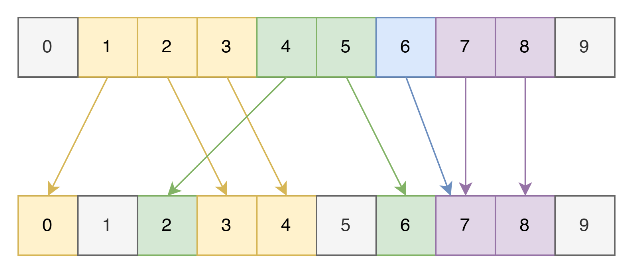

- с помощью 12 бит (`4096 = 2^12`) можно адресовать любую ячейку.

- значит что самих страниц может быть `2^64 / 2^12 = 2^52` штук.

- если адрес страницы = `2^8`бита (размер регистра), и это надо где-то хранить

- адреса самих страниц понадобится `2^64` байт памяти, а это примерно... ооочень много... (`2^10` - кило, `2^20` - мега `2^30` - гига, `2^40` - тера)

## Табличная адресация

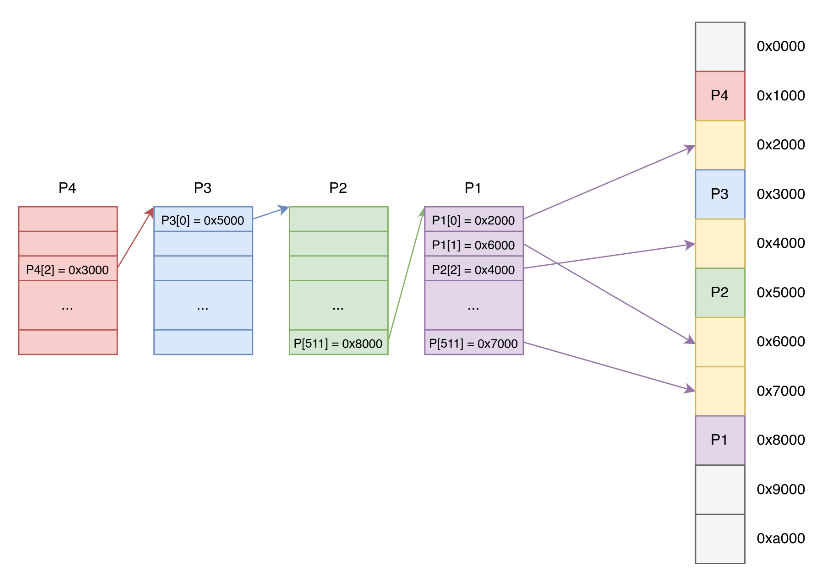

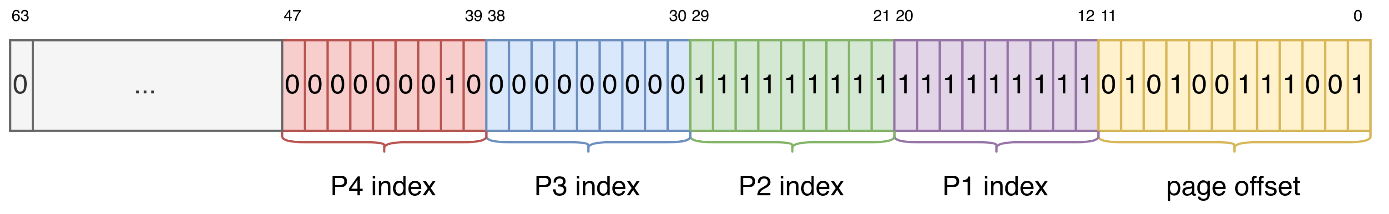

Помните, что страницы имеют размер 4K?

А значит младшие 12 **бит** (`2^12 = 4096`) у нас нули.

Вместо нулей хранятся флаги. Флаги отвечают за правад доступа к странице

(`PTE` - это `Page Table Entity` вроде...)
- `PTE_PRESENT` - флаг существования страницы (1 - да / 0 - нет)
- `PTE_WRITE` - разрешение на запись
- `PTE_USER` - доступность страницы из userspace-а
- ...

# mmap(...)

```c
void *mmap(
    void *addr,  // адресс, "в куда" отображать память

    size_t len,  // размер куска отображаемой памяти

    int prot,    // разрешения на этот кусок памяти
                 // PROT_NONE / PROT_READ / PROT_WRITE / PROT_EXEC

    int flags,   // прочие флаги и видимость для внешних процессов
                 // MAP_FIXED и MAP_SHARED / MAP_PRIVATE

    int fildes,  // файловый дескриптор, либо спец. значение
    off_t off,   // смещение относительно начала файла
);
```